Discuss Overall Findings and Answer the Questions given below.
1. What is the most popular book?
2. Are books with fewer pages rated higher than those with large page counts?
3. What is the most popular book of the 60s?
4. Who wrote the most pages?
5. What's an author's average page count?
6. How many books have been written with less than 200 pages?
7. What is Houghton Mifflin Harcourt's most popular book?
8. Display the most popular book written by each author.
9. What is the least popular book of the 90s?
10. What is the highest-rated book with over 500 pages?
11. Create graphs to better understand the existence of any correlations in the dataset.
12. If you can think of more questions that could be relevant to this analysis you can list
and answer them too.(efforts appreciated)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
bookdf= pd.read_csv(r"C:\Users\DELL\Desktop\my_file\books.csv",on_bad_lines ='skip')

In [4]:
bookdf.columns = ['book_id', 'title', 'author', 'ave_rating', 'isbn', 'isbn13',
       'lang_code', 'page_nums', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher']

In [5]:
bookdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_id             11123 non-null  int64  
 1   title               11123 non-null  object 
 2   author              11123 non-null  object 
 3   ave_rating          11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   lang_code           11123 non-null  object 
 7   page_nums           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [6]:
bookdf.head()

,book_id,title,author,ave_rating,isbn,isbn13,lang_code,page_nums,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [7]:
mostPopularBooks = bookdf.sort_values(by='ratings_count',ascending=False).loc[:,['title','author','ratings_count']].head(5)
mostPopularBooks

,title,author,ratings_count
10336,Twilight (Twilight #1),Stephenie Meyer,4597666
1697,The Hobbit or There and Back Again,J.R.R. Tolkien,2530894
1462,The Catcher in the Rye,J.D. Salinger,2457092
307,Angels & Demons (Robert Langdon #1),Dan Brown,2418736
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,2339585


In [8]:
for i in range(bookdf['page_nums'].size):
    if bookdf['page_nums'][i] == 0:
        bookdf.loc[i,'page_nums'] = round(bookdf['page_nums'].mean())

In [9]:
bookdf.sort_values(by='page_nums',ascending=False).head(5)

,book_id,title,author,ave_rating,isbn,isbn13,lang_code,page_nums,ratings_count,text_reviews_count,publication_date,publisher
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9780393060119,eng,6576,1338,81,10/17/2004,W. W. Norton Company
6802,25587,The Second World War,Winston S. Churchill/John Keegan,4.45,039541685X,9780395416853,eng,4736,1493,99,5/9/1986,Mariner Books
10906,44613,Remembrance of Things Past (Boxed Set),Marcel Proust/C.K. Scott Moncrieff/Frederick A...,4.34,0701125594,9780701125592,eng,3400,6,1,3/5/1981,Chatto & Windus
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
6822,25709,Summa Theologica 5 Vols,Thomas Aquinas,4.12,0870610635,9780870610639,eng,3020,2734,84,1/1/1981,Christian Classics


In [10]:
bookdf.corrwith(bookdf['ratings_count'])

book_id              -0.076820
ave_rating            0.038224
isbn13                0.005494
page_nums             0.033066
ratings_count         1.000000
text_reviews_count    0.865977
dtype: float64

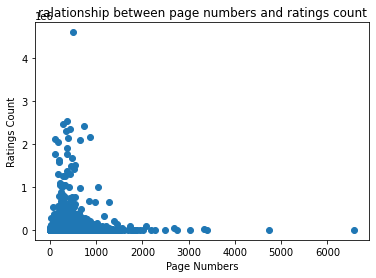

In [11]:
pageNumbers = bookdf['page_nums']
ratingCount = bookdf['ratings_count']
plt.scatter(pageNumbers,ratingCount)
plt.xlabel('Page Numbers')
plt.ylabel('Ratings Count')
plt.title('ralationship between page numbers and ratings count')
plt.show()

In [12]:
booksOfSixties = bookdf[(bookdf['publication_date'].str.slice(-4,) <'1960') & (bookdf['publication_date'].str.slice(-4,) >='1950')]
booksOfSixties.head()

,book_id,title,author,ave_rating,isbn,isbn13,lang_code,page_nums,ratings_count,text_reviews_count,publication_date,publisher
147,330,On Beyond Zebra!,Dr. Seuss,4.04,0394800842,9780394800844,eng,64,2815,164,9/12/1955,Random House Books for Young Readers
396,1363,The Histories,Herodotus/Aubrey de Sélincourt/John M. Marincola,3.99,0140446389,9780140446388,eng,622,227,18,9/1/1954,Penguin Classics
442,1462,Euripides I: Alcestis / The Medea / The Heracl...,Euripides/Richmond Lattimore/David Grene/Rex W...,4.03,0226307808,9780226307800,eng,221,4483,56,2/15/1955,University of Chicago Press
489,1548,Electra and Other Plays,Sophocles/E.F. Watling,4.14,0140440283,9780140440287,eng,218,135,9,4/30/1953,Penguin
492,1555,The Oedipus Plays of Sophocles,Sophocles/Paul Roche,3.97,0451621603,9780451621603,eng,390,8,1,9/1/1958,Signet Books (NY)


In [13]:
popularOfSixties = booksOfSixties.sort_values(by='ratings_count',ascending=False).loc[:,['book_id','title','author','ratings_count']]
popularOfSixties.head()

,book_id,title,author,ratings_count
3346,12220,A Streetcar Named Desire,Tennessee Williams,235224
5333,19307,Pippi in the South Seas,Astrid Lindgren/Gerry Bothmer,15193
3096,11389,Arrowsmith,Sinclair Lewis/E.L. Doctorow,5889
10373,42040,Love Poems and Sonnets,William Shakespeare,5808
442,1462,Euripides I: Alcestis / The Medea / The Heracl...,Euripides/Richmond Lattimore/David Grene/Rex W...,4483


In [14]:
bookdf.head(2)

,book_id,title,author,ave_rating,isbn,isbn13,lang_code,page_nums,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [15]:
mostPagesWrittenBy = bookdf.groupby('author').agg({'page_nums':'sum'}).sort_values(by='page_nums',ascending=False).head(1)
mostPagesWrittenBy

,page_nums
author,
Stephen King,18219


In [16]:
# bookdf.loc[:,['author','page_nums']].groupby('author').mean()

avegPagesOfAuthor = bookdf.groupby('author').agg({'page_nums':'mean'})
avegPagesOfAuthor.head()

,page_nums
author,
A.B. Yehoshua/Hillel Halkin,416.0
A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,256.0
A.E. Cunningham/Harlan Ellison/Charles F. Miller/Terry Dowling/Paul Rhoads/Jack Vance/Tom Shippey/Gene Wolfe/David Langford/Dan Simmons/David Mathew,232.0
A.J. Jacobs,389.0
A.M. Homes,256.0


6.

In [17]:
Bookslessthan200=bookdf[bookdf['page_nums']<200]

In [22]:
Bookslessthan200.shape[0]

2821

7. What is Houghton Mifflin Harcourt's most popular book?
Not Found

In [38]:
authdf=bookdf[bookdf['author']=="M"]

In [35]:
authdf

,book_id,title,author,ave_rating,isbn,isbn13,lang_code,page_nums,ratings_count,text_reviews_count,publication_date,publisher


8. Display the most popular book written by each author.

AuthorPopularBooks=bookdf.groupby('author').agg({'ratings_count':'max'})
seris=AuthorPopularBooks.index
fillterdf=pd.DataFrame(bookdf.columns)
for i in range(AuthorPopularBooks.size):
    newdf=bookdf[(bookdf['author']==seris[i]) & (bookdf['ratings_count']==AuthorPopularBooks['ratings_count'][i])]
    fillterdf.append(newdf)
fillterdf

In [103]:
eachAuthorPopularBooksRating = bookdf.groupby('author').agg({'ratings_count':'idxmax'})


In [104]:
fd = pd.DataFrame(np.random.rand(0,3),columns=['author','title','ratings'])

In [105]:
for i in eachAuthorPopularBooksRating['ratings_count']:
    t = pd.DataFrame([[bookdf['author'][i],bookdf['title'][i],i]],index=[i],columns=['author','title','ratings'])
    fd = pd.concat([fd,t])

In [106]:
fd

,author,title,ratings
8037,A.B. Yehoshua/Hillel Halkin,A Woman in Jerusalem,8037.0
4952,A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,Notes from Underground & A Confession (Everyma...,4952.0
10110,A.E. Cunningham/Harlan Ellison/Charles F. Mill...,Jack Vance: Critical Appreciations and a Bibli...,10110.0
7300,A.J. Jacobs,The Know-It-All: One Man's Humble Quest to Bec...,7300.0
7636,A.M. Homes,The Mistress's Daughter,7636.0
...,...,...,...
7381,Émile Zola/Henri Mitterand,La Bête humaine,7381.0
7383,Émile Zola/Robert Lethbridge/Elinor Dorday,La Débâcle,7383.0
7379,Émile Zola/Robin Buss/Brian Nelson,The Ladies' Paradise,7379.0
7375,Émile Zola/Roger Pearson,Germinal,7375.0


9. What is the least popular book of the 90s?

In [109]:
booksOfNinties = bookdf[(bookdf['publication_date'].str.slice(-4,) <'1990') & (bookdf['publication_date'].str.slice(-4,) >='1980')]

In [112]:
popularOfNinties = booksOfNinties.sort_values(by='ratings_count',ascending=True).loc[:,['book_id','title','author','ratings_count']]

In [113]:
popularOfNinties.head()

,book_id,title,author,ratings_count
7573,29091,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel/Michael John Petry,0
8052,30941,Choo Choo (Carry Along Book & Cassette Favorites),Virginia Lee Burton,0
10164,41117,Worlds of Wonder,Terry Pastor/Damon Knight/Philip K. Dick/C.M. ...,0
8939,34607,The Damnation Game,Clive Barker,0
10138,41044,Day and Night,Better Homes and Gardens,0


10. What is the highest-rated book with over 500 pages?

In [114]:
highestrated=bookdf[bookdf['page_nums']>500].sort_values(by='ave_rating',ascending=False)

In [116]:
highestrated.head(1)

,book_id,title,author,ave_rating,isbn,isbn13,lang_code,page_nums,ratings_count,text_reviews_count,publication_date,publisher
5648,20957,Colossians and Philemon: A Critical and Exeget...,R. McL. Wilson,5.0,0567044718,9780567044716,eng,512,1,0,12/7/2005,T&T Clark Int'l
